# Modelo de Classificação


Nesse notebook faremos analises referentes a modelos preditivos de classificação, onde nossa variável alvo será FTR (full time result)

## Entendendo as variáveis do dataset

link do dataset:

## 🏟️ Informações da Partida
* **Div** — Liga / divisão da partida.  
* **Date** — Data da partida (dd/mm/yy).  
* **Time** — Horário do início do jogo.  
* **HomeTeam** — Time mandante.  
* **AwayTeam** — Time visitante.  
* **Referee** — Árbitro da partida.

---

## ⚽ Placar e Resultados

* **FTHG** — Gols do mandante no fim do jogo.  
* **FTAG** — Gols do visitante no fim do jogo.  
* **FTR / Res** — Resultado final:  
  * `H` — vitória do mandante  
  * `D` — empate  
  * `A` — vitória do visitante  

* **HTHG** — Gols do mandante no intervalo.  
* **HTAG** — Gols do visitante no intervalo.  
* **HTR** — Resultado do intervalo (`H`, `D`, `A`).

---

## 💸 Odds – Bet365

* **B365H** — Odd vitória mandante.  
* **B365D** — Odd empate.  
* **B365A** — Odd vitória visitante.

---

## 💸 Odds – Pinnacle

* **PSH** — Pinnacle odd home.  
* **PSD** — Pinnacle odd draw.  
* **PSA** — Pinnacle odd away.


## 💸 Odds – Mercado (médias)

* **AvgH** — Média de odds home.  
* **AvgD** — Média de odds draw.  
* **AvgA** — Média de odds away.

---

## 🔢 Linhas de Gols – Over/Under

* **B365>2.5** — Bet365 over 2.5 gols.  
* **B365<2.5** — Bet365 under 2.5 gols.

* **P>2.5** — Pinnacle over 2.5 gols.  
* **P<2.5** — Pinnacle under 2.5 gols.

* **Max>2.5** — Maior odd over 2.5.  
* **Max<2.5** — Maior odd under 2.5.

* **Avg>2.5** — Média das odds over 2.5.  
* **Avg<2.5** — Média das odds under 2.5.

---
## 🥗 Adicionais
* **Home_Streak** - Sequencia de vitórias (positivo) e derrotas (negativo)  
* **Away_Streak** - Sequencia de vitórias (positivo) e derrotas (negativo)  
* **Home_CumPoints** - Pontos acumulados na temporada mandante  
* **Away_CumPoints** - Pontos acumulados na temporada visitante  
* **Home_WinRate5** - Taxa de vitória nos últimos 5 jogos mandante  
* **Away_WinRate5** - Taxa de vitória nos últimos 5 jogos visitante  
* **Home_GFGA5** - Taxa de Gols Feitos por Gols sofridos mandante  
* **Away_GFGA5** - Taxa de Gols Feitos por Gols sofridos visitante  
* **Diff_CumPoints** - Diferença dos pontos acumulados  
* **B365_gap** - Diferença entre as odds (visitante - mandante) da bet365  
* **PS_gap** - Diferença entre as odds (visitante - mandante) da pinnacle  
* **PSH_prob_norm** - Odd convertida em probabilidade - prob vitória mandante pinnacle  
* **B365H_prob_norm** - Odd convertida em probabilidade - prob vitória mandante b365


In [34]:
selected_features = [
    # Identificação básica
    'HomeTeam',
    'AwayTeam',
    'Season',

    # Força histórica acumulada
    'Home_CumPoints',
    'Away_CumPoints',
    'Diff_CumPoints',

    # Forma recente
    'Home_WinRate5',
    'Away_WinRate5',
    'Home_GFGA5',
    'Away_GFGA5',

    # Streak
    'Home_Streak',
    'Away_Streak',

    # Probabilidades normalizadas das casas
    'B365H_prob_norm',
    'B365D_prob_norm',
    'B365A_prob_norm',
    'PSH_prob_norm',
    'PSD_prob_norm',
    'PSA_prob_norm',

    # Diferenças de odds
    'B365_gap',
    'PS_gap',

    # Odds brutas (opcional, mas úteis)
    'B365H',
    'B365D',
    'B365A',
    'PSH',
    'PSD',
    'PSA',

    # Over/Under — trazem informação sobre expectativa de gols
    'Avg>2.5',
    'Avg<2.5',

    # Handicap asiático
    'AvgAHH',
    'AvgAHA',

    # Alvo
    'FTR'
]

# Importar Bibliotecas 

In [24]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

pd.set_option('display.max_columns', None)

# File Paths 

In [25]:
DATA_PATH = r'../data/premier_completo_expandido_19_25.csv'

# Carregar Dados 

In [26]:
df_raw = pd.read_csv(DATA_PATH)
print("\nPrimeiras linhas do conjunto de dados:")
df_raw.head(10)


Primeiras linhas do conjunto de dados:


,Div,Season,Date,Time,MatchID,HomeTeam,Home_CumPoints,Home_Streak,AwayTeam,Away_Streak,Away_CumPoints,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,PSH,PSD,PSA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,Goal_Diff_Home,Home_Win,B365H_prob,B365D_prob,B365A_prob,PSH_prob,PSA_prob,PSD_prob,B365H_prob_norm,B365D_prob_norm,B365A_prob_norm,PSH_prob_norm,PSA_prob_norm,PSD_prob_norm,Points_Home,Points_Away,B365_gap,PS_gap,Home_WinRate5,Home_GF5,Home_GA5,Home_GFGA5,Away_WinRate5,Away_GF5,Away_GA5,Away_GFGA5
0,E0,19,2019-08-09,20:00,0,Liverpool,0,0,Norwich,0,0,4,1,H,4,0,H,M Oliver,15,12,7,5,9,9,11,2,0,2,0,0,1.14,10.00,19.00,1.15,9.59,18.05,1.16,10.00,23.00,1.14,8.75,19.83,1.40,3.00,1.40,3.11,1.45,3.11,1.41,2.92,1.96,1.94,1.97,1.95,1.97,2.00,1.94,1.94,3,1,0.877193,0.100000,0.052632,0.869565,0.055402,0.104275,0.851789,0.097104,0.051107,0.844860,0.053828,0.101313,3,0,-17.86,-16.90,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
1,E0,19,2019-08-10,15:00,1,Bournemouth,0,0,Sheffield United,0,0,1,1,D,0,0,D,K Friend,13,8,3,3,10,19,3,4,2,1,0,0,1.95,3.60,3.60,2.04,3.57,3.90,2.06,3.65,4.00,2.01,3.53,3.83,1.90,1.90,1.96,1.96,2.00,1.99,1.90,1.93,2.01,1.89,2.04,1.88,2.04,1.91,2.00,1.88,0,0,0.512821,0.277778,0.277778,0.490196,0.256410,0.280112,0.480000,0.260000,0.260000,0.477440,0.249738,0.272823,1,1,-1.65,-1.86,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
2,E0,19,2019-08-10,15:00,2,Burnley,0,0,Southampton,0,0,3,0,H,0,0,D,G Scott,10,11,4,3,6,12,2,7,0,0,0,0,2.62,3.20,2.75,2.71,3.31,2.81,2.80,3.33,2.85,2.68,3.22,2.78,2.10,1.72,2.17,1.77,2.20,1.78,2.12,1.73,1.92,1.98,1.93,2.00,1.94,2.00,1.91,1.98,3,1,0.381679,0.312500,0.363636,0.369004,0.355872,0.302115,0.360818,0.295420,0.343762,0.359306,0.346519,0.294175,3,0,-0.13,-0.10,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
3,E0,19,2019-08-10,15:00,3,Crystal Palace,0,0,Everton,0,0,0,0,D,0,0,D,J Moss,6,10,2,3,16,14,6,2,2,1,0,1,3.00,3.25,2.37,3.21,3.37,2.39,3.21,3.40,2.52,3.13,3.27,2.40,2.20,1.66,2.23,1.74,2.25,1.74,2.18,1.70,1.85,2.05,1.88,2.05,1.88,2.09,1.84,2.04,0,0,0.333333,0.307692,0.421941,0.311526,0.418410,0.296736,0.313588,0.289466,0.396947,0.303433,0.407540,0.289027,1,1,0.63,0.82,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
4,E0,19,2019-08-10,17:30,4,Tottenham,0,0,Aston Villa,0,0,3,1,H,0,1,A,C Kavanagh,31,7,7,4,13,9,14,0,1,0,0,0,1.30,5.25,10.00,1.30,5.84,10.96,1.33,5.95,12.00,1.30,5.53,10.51,1.66,2.20,1.64,2.40,1.70,2.40,1.65,2.26,1.97,1.93,1.99,1.93,2.00,2.00,1.93,1.94,2,1,0.769231,0.190476,0.100000,0.769231,0.091241,0.171233,0.725890,0.179744,0.094366,0.745592,0.088437,0.165971,3,0,-8.70,-9.66,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
5,E0,19,2019-08-10,15:00,5,Watford,0,0,Brighton,0,0,0,3,A,0,1,A,C Pawson,11,5,3,3,15,11,5,2,0,1,0,0,1.90,3.40,4.00,1.98,3.44,4.37,2.00,3.50,4.60,1.94,3.41,4.26,2.10,1.72,2.19,1.76,2.24,1.76,2.16,1.71,1.95,1.95,1.98,1.95,1.98,1.98,1.94,1.94,-3,0,0.526316,0.294118,0.250000,0.505051,0.228833,0.290698,0.491685,0.274765,0.233550,0.492934,0.223343,0.283723,0,3,-2.10,-2.39,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
6,E0,19,2019-08-10,12:30,6,West Ham,0,0,Man City,0,0,0,5,A,0,1,A,M Dean,5,14,3,9,6,13,1,1,2,2,0,0,12.00,6.50,1.22,11.68,6.53,1.26,13.00,6.75,1.29,11.84,6.28,1.25,1.44,2.75,1.49,2.77,1.51,2.77,1.48,2.65,2.00,1.90,2.02,1.90,2.02,1.92,1.99,1.89,-5,0,0.083333,0.153846,0.819672,0.085616,0.793651,0.153139,0.078851,0.145570,0.775579,0.082929,0.768739,0.148332,0,3,10.78,10.42,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
7,E0,19,2019-08-11,14:00,7,Leicester,0,0,Wolves,0,0,0,0,D,0,0,D,A Marriner,15,8,1,2,3,13,12,3,0,2,0,0,2.20,3.20,3.40,2.21,3.34,3.66,2.29,3.38,3.66,2.22,3.28,3.48,2.20,1.66,2.23,1.74,2.25,1.74,2.17,1.70,1.90,2.00,1.90,2.04,1.95,2.04,1.91,1.98,0,0,0.454545,0.312500,0.294118,0.452489,0.273224,0.299401,0.428346,0.294488,0.277165,0.441403,0.266530,0.292066,1,1,-1.20,-1.45,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
8,E0,19,2019-08-11,16:30,8,Man United,0,0,Chelsea,0,0,4,0,H,1,0,H,A Taylor,11,18,5,7,15,13,3,5,3,4,0,0,2.1

nova feature 'Diff_CumPoints'

In [35]:
df_raw['Diff_CumPoints'] = df_raw['Home_CumPoints'] - df_raw['Away_CumPoints']

In [36]:
df_selected = df_raw[selected_features]

# Divisão dos dados 

In [37]:
# Agrupar dados aleatoriamente
# A variavel porcent_test define quantos porcento dos dados são para teste
# Nesse caso, 20% dos dados são para teste e 80% para treinamento.
porcent_test = 0.2
# Usamos random_state=42 para garantir reprodutibilidade
df_test = df_selected.sample(frac=porcent_test, random_state=42)
mask = df_selected.apply(tuple, 1).isin(df_test.apply(tuple, 1))

# Remove essas linhas do DataFrame original
df = df_selected[~mask].reset_index(drop=True)

# Calculando a porcentagem dos dados para cada conjunto
porcentagem_treinamento = (len(df) / len(df_selected)) * 100
porcentagem_teste = (len(df_test) / len(df_selected)) * 100

print(f"Dataset Original: {df_selected.shape}")
print(f"Dataset de Treinamento: {df.shape} ({porcentagem_treinamento:.2f}%)")
print(f"Dataset Final de Teste: {df_test.shape} ({porcentagem_teste:.2f}%)")
print(f"\n\nNúmero de amostras por classe:")
df['FTR'].value_counts()


Dataset Original: (2280, 31)
Dataset de Treinamento: (1824, 31) (80.00%)
Dataset Final de Teste: (456, 31) (20.00%)


Número de amostras por classe:


FTR
H    786
A    619
D    419
Name: count, dtype: int64

# Métrica de avaliação técnica

In [42]:
# Importa as bibliotecas necessárias para a construção do modelo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


def evaluate_classification(y, y_pred):
    """
    Avalia um modelo de classificação para resultado de partida (FTR):
    H = vitória mandante, D = empate, A = vitória visitante.
    """
    # Definimos a ordem das classes explicitamente
    labels = ['H', 'D', 'A']
    class_names = ['Vitória mandante', 'Empate', 'Vitória visitante']

    # 1) Acurácia
    accuracy = accuracy_score(y, y_pred)
    print(f'Acurácia: {accuracy:.4f}')

    # 2) Relatório de classificação
    print('\nRelatório de Classificação:')
    print(classification_report(y, y_pred, labels=labels, target_names=class_names))

    # 3) Matriz de confusão
    conf_matrix = confusion_matrix(y, y_pred, labels=labels)

    sns.heatmap(
        conf_matrix,
        annot=True,
        cmap='Blues',
        fmt='d',
        xticklabels=class_names,
        yticklabels=class_names
    )
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão - Resultado da Partida (FTR)')
    plt.show()

    # Retorna a acurácia para facilitar logging/comparação de modelos
    return accuracy


# Modelo Base (aleatório)

Acurácia: 0.3333

Relatório de Classificação:
                   precision    recall  f1-score   support

 Vitória mandante       0.43      0.33      0.37       786
           Empate       0.23      0.33      0.27       419
Vitória visitante       0.35      0.34      0.35       619

         accuracy                           0.33      1824
        macro avg       0.33      0.33      0.33      1824
     weighted avg       0.35      0.33      0.34      1824



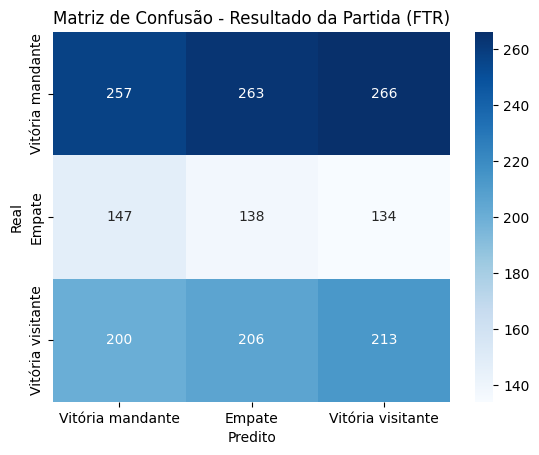

In [43]:
# Preparando os dados
# Seleciona as características e o alvo
X = df.drop(['FTR'], axis=1) # tudo menos o alvo
y = df['FTR']

# Define a lista de elementos
elements = y.unique()

# Define o tamanho do vetor aleatório
vector_length = len(y)  # Altera para o tamanho desejado

# Gera o vetor aleatório
y_pred_baseline = np.random.choice(elements, size=vector_length)

# Avalia e salva a acurácia do modelo aleatório
acc_aleatorio = evaluate_classification(y, y_pred_baseline)

# Modelo Baseado em Regras 

A probabilidade da casa ganhar (dada atraves da odd) pode nos dar uma boa noção do resultado final da partida (FTR)

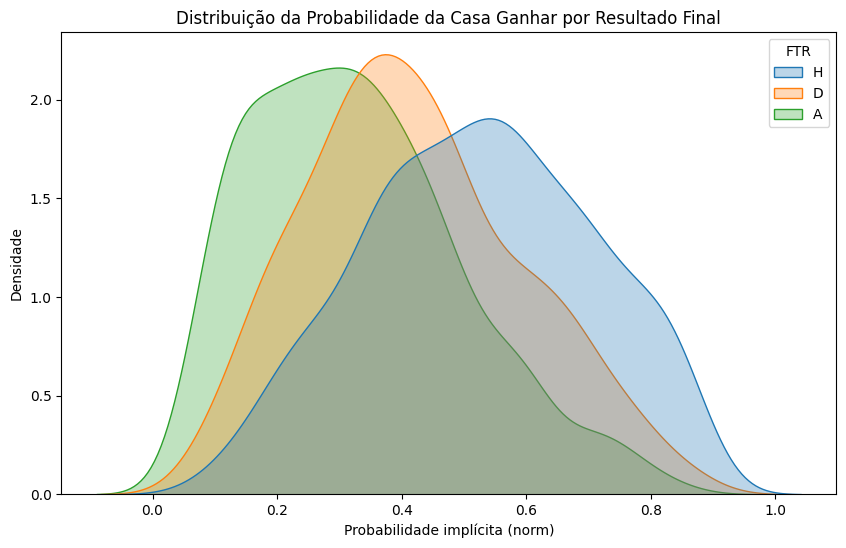

In [46]:
plt.figure(figsize=(10,6))

sns.kdeplot(data=df, x='B365H_prob_norm', hue='FTR', common_norm=False, fill=True, alpha=0.3)

plt.title('Distribuição da Probabilidade da Casa Ganhar por Resultado Final')
plt.xlabel('Probabilidade implícita (norm)')
plt.ylabel('Densidade')
plt.show()


Percebemos que há maior densidade de H (azul) nas faixas mais altas de probabilidade implícita. Enquanto a densidade de A (verde) só descresce a medida que aumenta a prob

Acurácia: 0.5016

Relatório de Classificação:
                   precision    recall  f1-score   support

 Vitória mandante       0.67      0.55      0.60       786
           Empate       0.28      0.45      0.34       419
Vitória visitante       0.59      0.48      0.53       619

         accuracy                           0.50      1824
        macro avg       0.51      0.49      0.49      1824
     weighted avg       0.55      0.50      0.52      1824



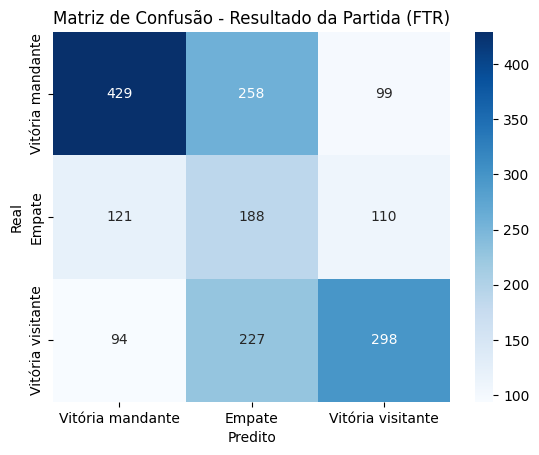

In [51]:
# Cria predições com base nas regras tipo de dor
def predict_by_pain_type(df):
    predictions = []
    for _, match in df.iterrows():
        if ((match['B365H_prob_norm'] > 0.3) & (match['B365H_prob_norm'] < 0.5)):
            predictions.append('D')  # Prediz empate

        elif (match['B365H_prob_norm'] >= 0.5):
            predictions.append('H')  # Prediz vitória da casa

        else:
            predictions.append('A') # Prediz vitória do visitante 
        
    return predictions

# Gera as predições
y_pred_pain_type = predict_by_pain_type(df)

# Avalia as predições e salva o valor da acurácia
acc_regras = evaluate_classification(y, y_pred_pain_type)

# Regressão Logística Multivariada

Vamos criar um modelo de regressão logística e avaliá-lo em relação ao modelo de base.

A **regressão logística** é um algoritmo de aprendizado de máquina supervisionado utilizado para tarefas de classificação, onde o objetivo é prever a probabilidade de que uma instância pertença a uma determinada classe.

É amplamente utilizado para problemas de classificação binária, onde a saída é uma variável categórica com dois valores possíveis, como 0 ou 1, que é o nosso caso.

--------------
Acurácia: 0.5493

Relatório de Classificação:
                   precision    recall  f1-score   support

 Vitória mandante       0.56      0.78      0.65       786
           Empate       0.25      0.00      0.00       419
Vitória visitante       0.53      0.63      0.57       619

         accuracy                           0.55      1824
        macro avg       0.45      0.47      0.41      1824
     weighted avg       0.48      0.55      0.48      1824



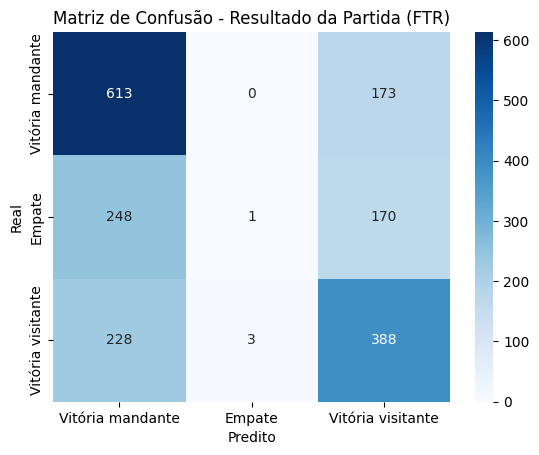

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# -----------------------------
# 1) Seleção de features e alvo
# -----------------------------
features = [
    'Home_CumPoints', 'Away_CumPoints', 'Diff_CumPoints',
    'Home_WinRate5', 'Away_WinRate5', 'Home_GFGA5', 'Away_GFGA5',
    'Home_Streak','Away_Streak','B365H_prob_norm','B365D_prob_norm','B365A_prob_norm', 'PSH_prob_norm', 'PSD_prob_norm',
    'PSA_prob_norm', 'B365_gap', 'PS_gap', 'B365H', 'B365D', 'B365A', 'PSH', 'PSD', 'PSA', 'Avg>2.5', 'Avg<2.5', 'AvgAHH','AvgAHA'
] # Tudo menos o alvo

X = df[features].copy()
y = df['FTR'].copy()

# -----------------------------
# 2) Lidar com valores nulos
# -----------------------------
# Numéricas -> mediana
num_cols = ['Home_CumPoints', 'Away_CumPoints', 'Diff_CumPoints',
    'Home_WinRate5', 'Away_WinRate5', 'Home_GFGA5', 'Away_GFGA5',
    'Home_Streak','Away_Streak','B365H_prob_norm','B365D_prob_norm','B365A_prob_norm', 'PSH_prob_norm', 'PSD_prob_norm',
    'PSA_prob_norm', 'B365_gap', 'PS_gap', 'B365H', 'B365D', 'B365A', 'PSH', 'PSD', 'PSA', 'Avg>2.5', 'Avg<2.5', 'AvgAHH','AvgAHA'] # Todas são numéricas
num_imputer = SimpleImputer(strategy='median')
X[num_cols] = num_imputer.fit_transform(X[num_cols])

# -----------------------------
# 3) Normalização (Min-Max) nos numéricos
# -----------------------------
scaler = MinMaxScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# -----------------------------
# 4) Modelo: Regressão Logística
# -----------------------------
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X, y)

# -----------------------------
# 5) Predição e avaliação
# -----------------------------
y_pred_lr = model_lr.predict(X)

print('--------------')
acc_lr = evaluate_classification(y, y_pred_lr)


## Importancia das variáveis

In [64]:
# Imprimi a importância das características
feature_importance_lr = pd.DataFrame({
    'Feature': features,
    'Coefficient': abs(model_lr.coef_[0])
})
print("\nImportância das Características:")
print(feature_importance_lr.sort_values('Coefficient', ascending=False))


Importância das Características:
            Feature  Coefficient
14    PSA_prob_norm     0.717311
7       Home_Streak     0.574327
20              PSH     0.564995
11  B365A_prob_norm     0.539264
12    PSH_prob_norm     0.534376
17            B365H     0.434459
9   B365H_prob_norm     0.402150
18            B365D     0.377065
5        Home_GFGA5     0.365739
8       Away_Streak     0.357057
4     Away_WinRate5     0.342603
19            B365A     0.330481
6        Away_GFGA5     0.312619
16           PS_gap     0.226993
21              PSD     0.200059
23          Avg>2.5     0.175989
3     Home_WinRate5     0.169958
26           AvgAHA     0.165406
24          Avg<2.5     0.162455
13    PSD_prob_norm     0.108798
10  B365D_prob_norm     0.061482
25           AvgAHH     0.055760
22              PSA     0.052319
1    Away_CumPoints     0.051614
15         B365_gap     0.046623
0    Home_CumPoints     0.039258
2    Diff_CumPoints     0.008918


C:\Users\danie\AppData\Local\Temp\ipykernel_18984\233885274.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


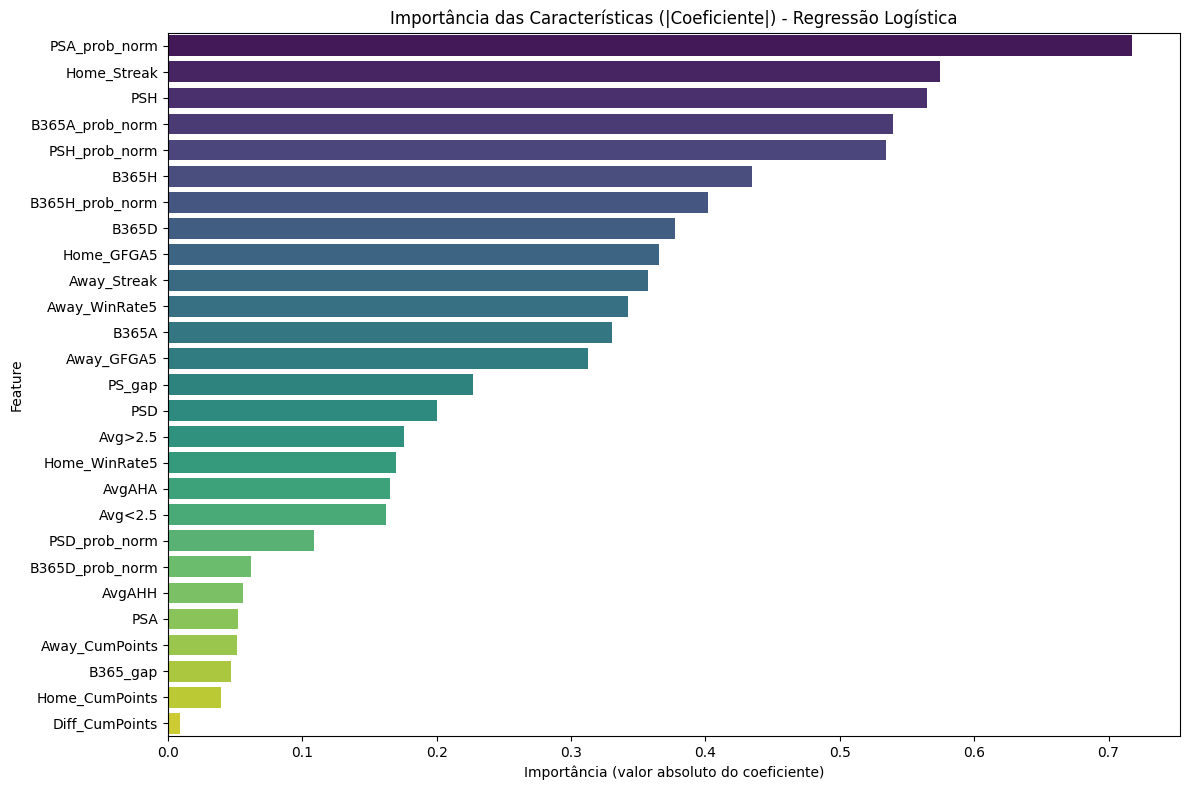

In [63]:
plt.figure(figsize=(12, 8))

# Ordena antes de plotar
sorted_df = feature_importance_lr.sort_values('Coefficient', ascending=False)

sns.barplot(
    data=sorted_df,
    x='Coefficient',
    y='Feature',
    palette='viridis'
)

plt.title('Importância das Características (|Coeficiente|) - Regressão Logística')
plt.xlabel('Importância (valor absoluto do coeficiente)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


## Utilizando os dados de teste 

--------------
Acurácia: 0.5461

Relatório de Classificação:
                   precision    recall  f1-score   support

 Vitória mandante       0.58      0.79      0.67       207
           Empate       0.50      0.01      0.02       106
Vitória visitante       0.49      0.59      0.54       143

         accuracy                           0.55       456
        macro avg       0.52      0.46      0.41       456
     weighted avg       0.53      0.55      0.48       456



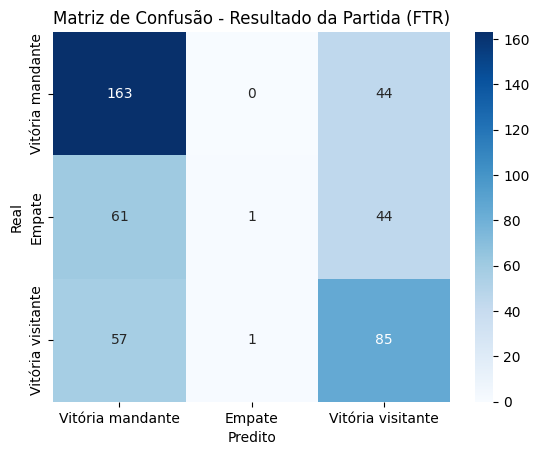

In [65]:
# 1) Seleciona do df_test
X_test = df_test[features].copy()
y_test = df_test['FTR'].copy()

# 2) Numéricas -> mediana 
num_imputer_test = SimpleImputer(strategy='median')
X_test[num_cols] = num_imputer_test.fit_transform(X_test[num_cols])

# 3) Min-Max nas numéricas 
scaler_test = MinMaxScaler()
X_test[num_cols] = scaler_test.fit_transform(X_test[num_cols])

# 4) Predição com o modelo já treinado
y_pred_lr_test = model_lr.predict(X_test)

# 5) Avaliação
print('--------------')
acc_lr_test = evaluate_classification(y_test, y_pred_lr_test)

## Comparação com os outros modelos 

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_model_comparison(resultados):

    # Cria um DataFrame a partir do dicionário
    df_resultados = pd.DataFrame(resultados.items(), columns=['Modelo', 'Acurácia'])

    # Converte acurácia para porcentagem
    df_resultados['Acurácia (%)'] = df_resultados['Acurácia'] * 100

    print("Tabela de Comparação de Modelos:")
    print(df_resultados.to_string(index=False))

    # Cria a plotagem
    fig, ax = plt.subplots(figsize=(10, 6))

    # Define a quantidade de modelos
    num_modelos = len(resultados)

    # Gera cores dinâmicas a partir de um mapa de cores
    cores = plt.cm.viridis(np.linspace(0.2, 0.8, num_modelos))

    # Cria o gráfico de barras
    bars = ax.bar(df_resultados['Modelo'], df_resultados['Acurácia (%)'], color=cores)

    ax.set_ylim(0, 105)
    ax.set_title('Comparação de Acurácia entre Modelos')
    ax.set_xlabel('Modelo de Predição')
    ax.set_ylabel('Acurácia (%)')

    plt.tight_layout()
    plt.show()

Tabela de Comparação de Modelos:
                  Modelo  Acurácia  Acurácia (%)
        Modelo Aleatório  0.333333     33.333333
Modelo Baseado em Regras  0.501645     50.164474
         Primeiro Modelo  0.549342     54.934211


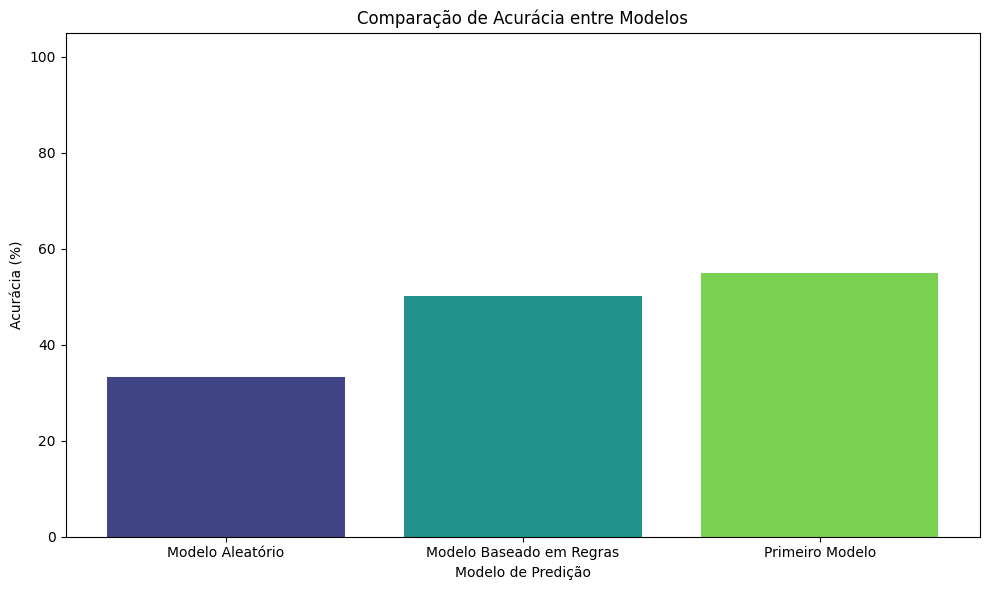

In [59]:
acuracias_dos_modelos = {
    'Modelo Aleatório': acc_aleatorio,
    'Modelo Baseado em Regras': acc_regras,
    'Primeiro Modelo': acc_lr
}

plot_model_comparison(acuracias_dos_modelos)

# Random Forest

Criaremos um segundo modelo diferente da Regressão Logística, usando dessa vez o Random Forest e vamos em sequência avaliá-lo.

O **Random Forest** constrói uma "floresta" de árvores de decisão, desse modo, cada árvore faz uma previsão de forma individual. O resultado final é a média das previsões de todas as árvores (para regressão) ou a previsão mais votada pela maioria das árvores (para classificação).

--------------
Acurácia: 1.0000

Relatório de Classificação:
                   precision    recall  f1-score   support

 Vitória mandante       1.00      1.00      1.00       786
           Empate       1.00      1.00      1.00       419
Vitória visitante       1.00      1.00      1.00       619

         accuracy                           1.00      1824
        macro avg       1.00      1.00      1.00      1824
     weighted avg       1.00      1.00      1.00      1824



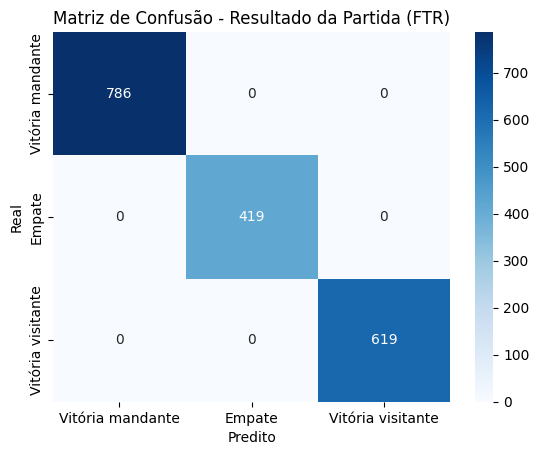

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# -----------------------------
# 1) Seleciona features e alvo
# -----------------------------
features = [
    'Home_CumPoints', 'Away_CumPoints', 'Diff_CumPoints',
    'Home_WinRate5', 'Away_WinRate5', 'Home_GFGA5', 'Away_GFGA5',
    'Home_Streak','Away_Streak','B365H_prob_norm','B365D_prob_norm','B365A_prob_norm', 'PSH_prob_norm', 'PSD_prob_norm',
    'PSA_prob_norm', 'B365_gap', 'PS_gap', 'B365H', 'B365D', 'B365A', 'PSH', 'PSD', 'PSA', 'Avg>2.5', 'Avg<2.5', 'AvgAHH','AvgAHA'
]
X = df[features].copy()
y = df['FTR'].copy()

# -----------------------------
# 2) Define tipos de colunas
# -----------------------------
categorical_cols = []
# numéricas “cruas” (sem normalização) — aqui só o binário FastingBS
numerical_cols = []
# numéricas normalizadas 
numerical_cols_normalized = ['Home_CumPoints', 'Away_CumPoints', 'Diff_CumPoints',
    'Home_WinRate5', 'Away_WinRate5', 'Home_GFGA5', 'Away_GFGA5',
    'Home_Streak','Away_Streak','B365H_prob_norm','B365D_prob_norm','B365A_prob_norm', 'PSH_prob_norm', 'PSD_prob_norm',
    'PSA_prob_norm', 'B365_gap', 'PS_gap', 'B365H', 'B365D', 'B365A', 'PSH', 'PSD', 'PSA', 'Avg>2.5', 'Avg<2.5', 'AvgAHH','AvgAHA']

# -----------------------------
# 3) Pré-processamento
# -----------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('num_normalized', MinMaxScaler(), numerical_cols_normalized),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ]
)

# -----------------------------
# 4) Pipeline + modelo
# -----------------------------
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=22, n_estimators=300))
])

# -----------------------------
# 5) Treino e avaliação 
# -----------------------------
model_rf.fit(X, y)
y_pred_rf = model_rf.predict(X)

print('--------------')
acc_rf = evaluate_classification(y, y_pred_rf)


## Utilizando os dados de teste 

Acurácia: 0.5219

Relatório de Classificação:
                   precision    recall  f1-score   support

 Vitória mandante       0.61      0.63      0.62       207
           Empate       0.50      0.03      0.05       106
Vitória visitante       0.44      0.73      0.55       143

         accuracy                           0.52       456
        macro avg       0.52      0.46      0.41       456
     weighted avg       0.53      0.52      0.47       456



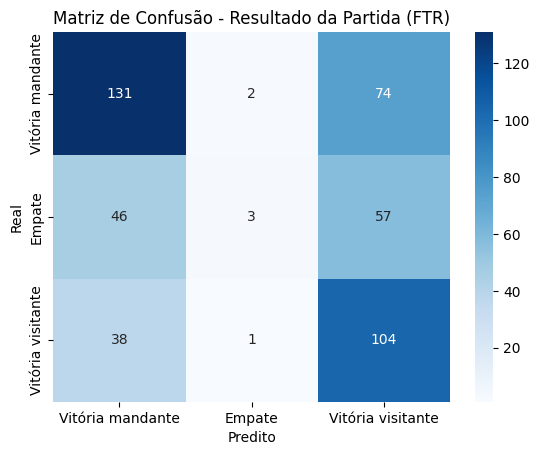

In [67]:
# Vamos utilizar o segundo modelo aqui para fazer a previsão
y_pred_test = model_rf.predict(X_test)

acc_rf_test = evaluate_classification(y_test, y_pred_test)